## Imports

In [2]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import LinearSVC
import sklearn.metrics as metrics
from sklearn.metrics import roc_auc_score
from scipy import stats
from sklearn.metrics import RocCurveDisplay
from itertools import cycle
from sklearn.preprocessing import LabelBinarizer


import seaborn as sns
import matplotlib.pyplot as plt


## Reading X_Test.npz and CSV

In [39]:
npz = np.load("X_kannada_MNIST_test.npz")
df= pd.DataFrame(columns =list(range(784)))

for i in range(len(npz['arr_0'])):
    df.loc[len(df)] = npz['arr_0'][i].flatten()
    
df.head()    
df.to_csv('X_kannada_MNIST_test.csv', index=False)


,0,1,2,3,4,5,6,7,8,9,...,774,775,776,777,778,779,780,781,782,783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### PCA X_Test and CSV

In [43]:
pca = PCA(n_components=10)
pca.fit(df)
x_pca = pca.transform(df)
df_pca = pd.DataFrame(x_pca,columns=[f'PC{i+1}' for i in range(10)])
df_pca.to_csv('PCA_X_kannada_MNIST_test.csv', index=False)



df_pca.shape

(10000, 10)

## Reading X_Train and CSV

In [50]:
npz = np.load("X_kannada_MNIST_train.npz")
df= pd.DataFrame(columns =list(range(784)))

for i in range(len(npz['arr_0'])-40000):
    df.loc[len(df)] = npz['arr_0'][i].flatten()
    


In [51]:
for i in range(len(npz['arr_0'])-40000,len(npz['arr_0'])-20000):
    df.loc[len(df)] = npz['arr_0'][i].flatten()
    



In [52]:
for i in range(len(npz['arr_0'])-20000,len(npz['arr_0'])):
    df.loc[len(df)] = npz['arr_0'][i].flatten()
    
df.head()    


,0,1,2,3,4,5,6,7,8,9,...,774,775,776,777,778,779,780,781,782,783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [53]:
df.to_csv('X_kannada_MNIST_train.csv', index=False)

In [54]:
pca = PCA(n_components=10)
pca.fit(df)
x_pca = pca.transform(df)
df_pca = pd.DataFrame(x_pca,columns=[f'PC{i+1}' for i in range(10)])
df_pca.to_csv('PCA_X_kannada_MNIST_train.csv', index=False)



# df_pca.shape

## Read Y_Train

In [22]:
npz = np.load("y_kannada_MNIST_test.npz")
# print(type(npz['arr_0']))
ydf = pd.DataFrame(npz['arr_0'])
# for i in range(len(npz['arr_0'])):
# np.savetxt("y_kannada_MNIST_test.csv", npz['arr_0'],delimiter = ",")
ydf.to_csv('y_kannada_MNIST_test.csv', index=False)
# ydf

In [26]:
npz = np.load("y_kannada_MNIST_train.npz")
ydf = pd.DataFrame(npz['arr_0'])

# for i in range(len(npz['arr_0'])):
# np.savetxt("y_kannada_MNIST_train.csv", npz['arr_0'],delimiter = ",")
ydf.to_csv('y_kannada_MNIST_train.csv', index=False)


## Dataframe to predict and test

In [3]:
X_train = pd.read_csv("PCA_X_kannada_MNIST_train.csv")
X_test = pd.read_csv("PCA_X_kannada_MNIST_test.csv")
y_train = pd.read_csv("y_kannada_MNIST_train.csv")
y_test = pd.read_csv("y_kannada_MNIST_test.csv")

In [4]:
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(60000, 10) (60000, 1)
(10000, 10) (10000, 1)


## ML models

In [20]:
def run_model(model,X_train,y_train,X_test,y_test,model_type = 1):

    model.fit(X_train, y_train)
    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)
    print("\nTraining Accuracy score:",accuracy_score(y_train, y_pred_train))
    print("Testing Accuracy score:",accuracy_score(y_test, y_pred_test))

    print(classification_report(y_test, y_pred_test))#, target_names=['not relevant', 'relevant']))

    cm = confusion_matrix(y_test, y_pred_test)
    # print('Confusion matrix\n', cm)

    # cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive', 'Actual Negative'],
    #                     index=['Predict Positive', 'Predict Negative'])
    sns.heatmap(cm, annot=True, fmt='d', cmap='YlGnBu')
    plt.show()
    
    classes = model.classes_
    classes
    
    if model_type == 1:


        label_binarizer = LabelBinarizer().fit(y_train)
        y_onehot_test = label_binarizer.transform(y_test)
        y_onehot_test.shape  # (n_samples, n_classes)
        
        y_proba = model.predict_proba(X_test)
        
        fig, ax = plt.subplots(figsize=(6, 6))



        colors = cycle(["aqua", "darkorange", "cornflowerblue","crimson","purple","lawngreen","navy","teal","darkslategrey","yellow"])
        for class_id, color in zip(range(len(classes)), colors):
            RocCurveDisplay.from_predictions(
                y_onehot_test[:, class_id],
                y_proba[:, class_id],
                name=f"ROC curve for {class_id}",
                color=color,
                ax=ax,
                # plot_chance_level=(class_id == 2),
            )

        plt.axis("square")
        plt.xlabel("False Positive Rate")
        plt.ylabel("True Positive Rate")
        plt.title("Extension of Receiver Operating Characteristic\nto One-vs-Rest multiclass")
        plt.legend()
        plt.show()
        
#         probs = model.predict_proba(X_test)
#         preds = probs[:,1]
#         fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
#         roc_auc = metrics.auc(fpr, tpr)

#         plt.title('Receiver Operating Characteristic')
#         plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
#         plt.legend(loc = 'lower right')
#         plt.plot([0, 1], [0, 1],'r--')
#         plt.xlim([0, 1])
#         plt.ylim([0, 1])
#         plt.ylabel('True Positive Rate')
#         plt.xlabel('False Positive Rate')
#         plt.show()

### Decision Tree


Training Accuracy score: 1.0
Testing Accuracy score: 0.3064
              precision    recall  f1-score   support

           0       0.39      0.51      0.44      1000
           1       0.32      0.26      0.28      1000
           2       0.64      0.62      0.63      1000
           3       0.33      0.35      0.34      1000
           4       0.26      0.19      0.22      1000
           5       0.21      0.21      0.21      1000
           6       0.29      0.31      0.30      1000
           7       0.16      0.16      0.16      1000
           8       0.34      0.39      0.37      1000
           9       0.08      0.08      0.08      1000

    accuracy                           0.31     10000
   macro avg       0.30      0.31      0.30     10000
weighted avg       0.30      0.31      0.30     10000



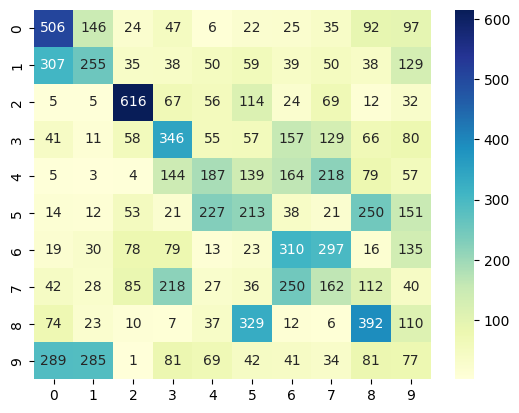

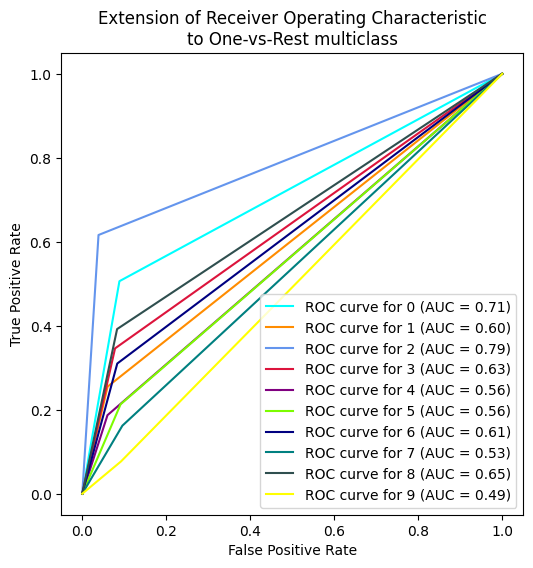

In [21]:
rand_state = 123

# Decision Tree
model_dt = DecisionTreeClassifier(random_state=rand_state)
run_model(model_dt,X_train,y_train,X_test,y_test,1)

### Random Forest



Training Accuracy score: 0.9999
Testing Accuracy score: 0.3965
              precision    recall  f1-score   support

           0       0.53      0.63      0.58      1000
           1       0.29      0.31      0.30      1000
           2       0.82      0.82      0.82      1000
           3       0.40      0.54      0.46      1000
           4       0.34      0.25      0.29      1000
           5       0.29      0.26      0.27      1000
           6       0.45      0.42      0.43      1000
           7       0.14      0.13      0.14      1000
           8       0.44      0.53      0.48      1000
           9       0.11      0.08      0.09      1000

    accuracy                           0.40     10000
   macro avg       0.38      0.40      0.39     10000
weighted avg       0.38      0.40      0.39     10000



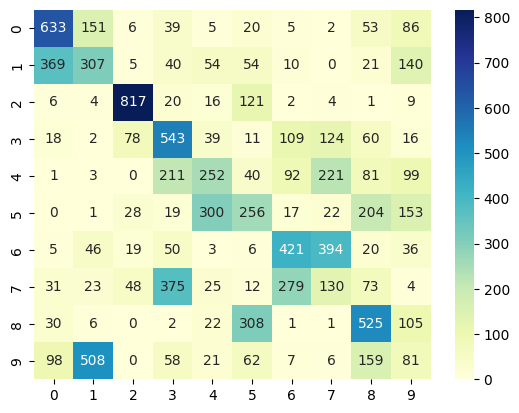

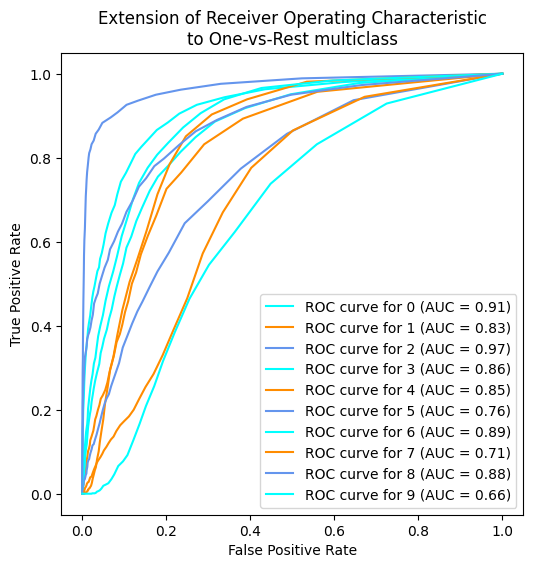

In [8]:
#Random Forest
model_rf = RandomForestClassifier(n_estimators=50)
run_model(model_rf,X_train,y_train.values.ravel(),X_test,y_test.values.ravel(),1)

### KNN



Training Accuracy score: 0.9782666666666666
Testing Accuracy score: 0.3657
              precision    recall  f1-score   support

           0       0.48      0.58      0.53      1000
           1       0.32      0.29      0.30      1000
           2       0.75      0.64      0.69      1000
           3       0.36      0.48      0.41      1000
           4       0.32      0.31      0.32      1000
           5       0.24      0.26      0.25      1000
           6       0.37      0.36      0.37      1000
           7       0.16      0.13      0.14      1000
           8       0.48      0.51      0.49      1000
           9       0.12      0.09      0.10      1000

    accuracy                           0.37     10000
   macro avg       0.36      0.37      0.36     10000
weighted avg       0.36      0.37      0.36     10000



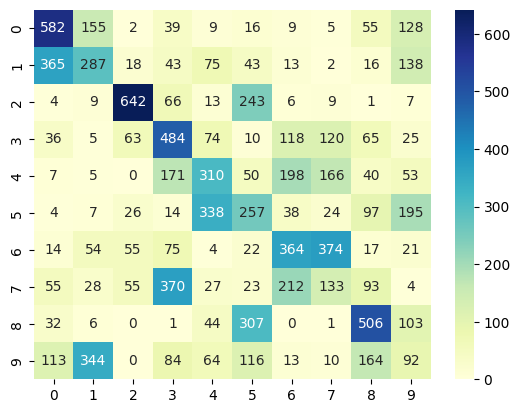

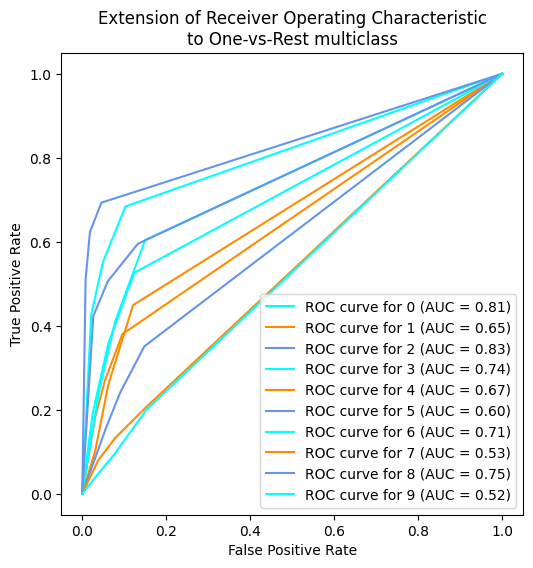

In [8]:
#KNN

model_knn = KNeighborsClassifier(n_neighbors=3)
run_model(model_knn,X_train,y_train.values.ravel(),X_test,y_test.values.ravel())

### Gaussian NB



Training Accuracy score: 0.8678166666666667
Testing Accuracy score: 0.4416
              precision    recall  f1-score   support

           0       0.58      0.63      0.60      1000
           1       0.36      0.40      0.38      1000
           2       0.68      0.91      0.78      1000
           3       0.41      0.48      0.45      1000
           4       0.18      0.08      0.11      1000
           5       0.42      0.18      0.26      1000
           6       0.55      0.60      0.57      1000
           7       0.18      0.26      0.21      1000
           8       0.56      0.70      0.62      1000
           9       0.28      0.19      0.23      1000

    accuracy                           0.44     10000
   macro avg       0.42      0.44      0.42     10000
weighted avg       0.42      0.44      0.42     10000



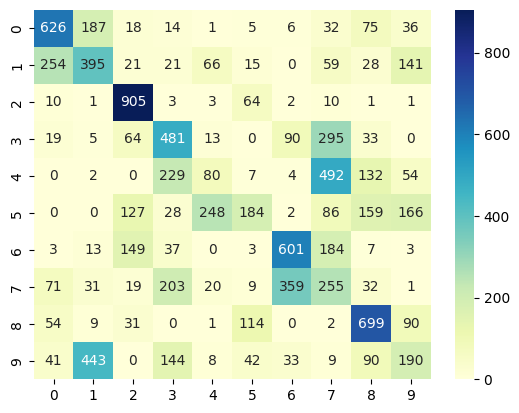

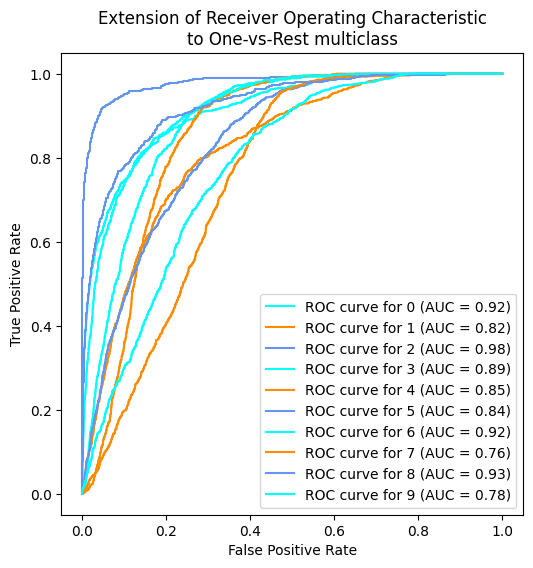

In [48]:
# Gaussian NB

model_gnb = GaussianNB()
# run_model(model_gnb,X_train,y_train,X_test,y_test)
run_model(model_gnb,X_train,y_train.values.ravel(),X_test,y_test.values.ravel())


### Linear SVM


C:\Users\SVR\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(



Training Accuracy score: 0.7767166666666667
Testing Accuracy score: 0.3434
              precision    recall  f1-score   support

           0       0.46      0.41      0.43      1000
           1       0.37      0.29      0.33      1000
           2       0.76      0.87      0.81      1000
           3       0.31      0.20      0.24      1000
           4       0.14      0.07      0.09      1000
           5       0.15      0.20      0.17      1000
           6       0.41      0.36      0.38      1000
           7       0.07      0.10      0.09      1000
           8       0.37      0.34      0.35      1000
           9       0.39      0.60      0.47      1000

    accuracy                           0.34     10000
   macro avg       0.34      0.34      0.34     10000
weighted avg       0.34      0.34      0.34     10000



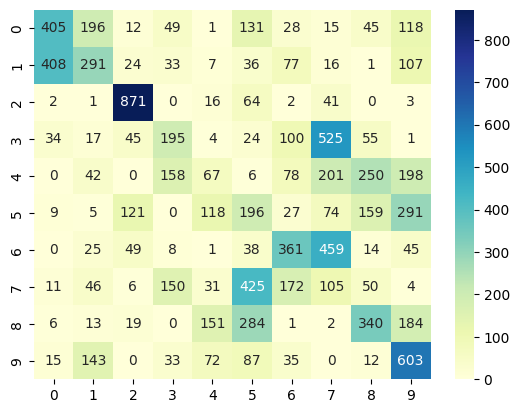

In [7]:
# Linear SVM
model_svc = LinearSVC(class_weight='balanced')
# run_model(model_svc,X_train,y_train,X_test,y_test,2)
run_model(model_svc,X_train,y_train.values.ravel(),X_test,y_test.values.ravel(),2)